In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import math

In [2]:
data = pd.read_csv("/home/jorge/tfm-jvm/data/data/data_7.csv")
del data["n_days"]
data

,id_p,N_last,N_first,N_diff_positive,N_diff_negative,pop_sum_mean,pop_sum_std,pop_mean_mean,pop_mean_std,norm2_mean_mean,...,hunos,romanos_increase,germanos_increase,galos_increase,egipcios_increase,hunos_increase,rs_day_last,p_play,p_play_weekend,p_play_week
0,9,3,2,1.0,0.0,1013.714286,257.146336,370.380952,45.911621,47.580120,...,0,0,0,1,0,0,16,0.857143,0.5,1.0
1,10,17,16,1.0,0.0,12741.428571,418.476944,762.258403,6.744138,62.318751,...,0,1,0,0,0,0,137,1.000000,1.0,1.0
2,12,3,3,0.0,0.0,1611.857143,111.475601,537.285714,37.158534,191.223381,...,3,0,0,0,0,0,16,1.000000,1.0,1.0
3,14,2,2,0.0,0.0,369.428571,5.563486,184.714286,2.781743,117.222537,...,0,0,0,0,0,0,13,0.428571,0.5,0.4
4,19,1,1,0.0,0.0,214.285714,22.932613,214.285714,22.932613,94.831429,...,0,0,0,0,0,0,30,0.714286,0.5,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117746,325241,1,1,0.0,0.0,372.285714,132.022365,372.285714,132.022365,149.187801,...,0,0,0,0,0,0,16,0.571429,0.5,0.6
117747,325245,2,1,1.0,0.0,474.571429,114.277232,283.285714,36.341961,110.448218,...,0,0,0,1,0,0,30,0.857143,1.0,0.8
117748,325246,1,1,0.0,0.0,205.142857,27.051978,205.142857,27.051978,100.801786,...,0,0,0,0,0,0,35,1.000000,1.0,1.0
117749,325248,2,2,0.0,0.0,322.142857,34.681544,161.071429,17.340772,113.135773,...,0,0,0,0,0,0,32,0.714286,0.0,1.0


## Get 4 clusters

In [3]:
%%time
K = KMeans(n_clusters=4,).fit_predict(data)

CPU times: user 7.33 s, sys: 221 ms, total: 7.55 s
Wall time: 4.02 s


In [8]:
ks = pd.Series(K, name="cluster")
ks

0         1
1         1
2         1
3         1
4         1
         ..
117746    2
117747    2
117748    2
117749    2
117750    2
Name: cluster, Length: 117751, dtype: int32

In [10]:
clusters = pd.DataFrame({"id_p" : data["id_p"], "cluster":ks})
clusters

,id_p,cluster
0,9,1
1,10,1
2,12,1
3,14,1
4,19,1
...,...,...
117746,325241,2
117747,325245,2
117748,325246,2
117749,325248,2


In [11]:
clusters.to_csv("/home/jorge/tfm-jvm/data/data/clusters.csv", index=False)

In [4]:
def rep(X, r):
    l = []
    for x in X:
        for i in range(r):
            l.append(x)
    return l

In [7]:
n_centers = list(range(2,35))
n_tries = 3
repe = rep(n_centers, n_tries)

In [8]:
%%time
ks = []
for i in repe:
    k = KMeans(n_clusters=i)
    k_labels = k.fit_predict(data)
    k_silhouette = silhouette_score(data, k_labels)
    ks.append((i, k_silhouette, k.inertia_, k.cluster_centers_))    
    print("centers: " + str(i) + " silhuouette: " + str(k_silhouette) + " inertia: " + str(k.inertia_)) 

centers: 2 silhuouette: 0.7489201133159722 inertia: 506800823875.08014
centers: 2 silhuouette: 0.7489201133159722 inertia: 506800823875.08014
centers: 2 silhuouette: 0.7489201133159722 inertia: 506800823875.08014
centers: 3 silhuouette: 0.6979874737987461 inertia: 259954159809.38104
centers: 3 silhuouette: 0.6979874737987461 inertia: 259954159809.38104
centers: 3 silhuouette: 0.6979874737987461 inertia: 259954159809.38104
centers: 4 silhuouette: 0.6630661733009559 inertia: 164870351694.2118
centers: 4 silhuouette: 0.6634036928516048 inertia: 164869329875.75577
centers: 4 silhuouette: 0.6630295222034381 inertia: 164870914261.99963
centers: 5 silhuouette: 0.6411959403056353 inertia: 116516211297.8295
centers: 5 silhuouette: 0.6411997020273211 inertia: 116516269458.80215
centers: 5 silhuouette: 0.6411959403056353 inertia: 116516211297.8295
centers: 6 silhuouette: 0.612800441387465 inertia: 87627901730.24898
centers: 6 silhuouette: 0.612800441387465 inertia: 87627901730.24898
centers: 6 si

In [10]:
my_ks = pd.DataFrame(ks, columns=["k", "silhouette", "inertia", "centers"])
my_ks

,k,silhouette,inertia,centers
0,2,0.748920,5.068008e+11,"[[3.4698902195593093, 3.1161976047890856, 0.59..."
1,2,0.748920,5.068008e+11,"[[3.4698902195593093, 3.1161976047890856, 0.59..."
2,2,0.748920,5.068008e+11,"[[14.68639963534694, 14.076405902796221, 1.170..."
3,3,0.697987,2.599542e+11,"[[2.8076248205418164, 2.4987124854691807, 0.51..."
4,3,0.697987,2.599542e+11,"[[9.893774469734236, 9.255861979952435, 1.1452..."
...,...,...,...,...
94,33,0.356608,1.134432e+10,"[[14.073017683970434, 13.521391899600644, 0.90..."
95,33,0.359367,1.133851e+10,"[[1.8679608697864012, 1.7664858837257462, 0.26..."
96,34,0.356445,1.103181e+10,"[[7.593178717598743, 7.136152796725746, 0.6706..."
97,34,0.359376,1.101909e+10,"[[1.2789546930580822, 1.1113860110317164, 0.22..."


In [12]:
my_ks.to_csv("/home/jorge/tfm-jvm/data/simulations/kmeans_k_2_35_n_3.csv", index=False)

In [4]:
my_ks = pd.read_csv("/home/jorge/tfm-jvm/data/simulations/kmeans_k_2_35_n_3.csv")

In [5]:
my_ks["norm_inertia"] = my_ks["inertia"]/my_ks["inertia"].max()
my_ks["standart_inertia"] = (my_ks["inertia"] - my_ks["inertia"].mean())/my_ks["inertia"].std()

In [6]:
my_ks

,k,silhouette,inertia,centers,norm_inertia,standart_inertia
0,2,0.748920,5.068008e+11,[[ 3.46989022e+00 3.11619760e+00 5.93792415e...,1.000000,4.749688
1,2,0.748920,5.068008e+11,[[ 3.46989022e+00 3.11619760e+00 5.93792415e...,1.000000,4.749688
2,2,0.748920,5.068008e+11,[[ 1.46863996e+01 1.40764059e+01 1.17036066e...,1.000000,4.749688
3,3,0.697987,2.599542e+11,[[ 2.80762482e+00 2.49871249e+00 5.17877082e...,0.512932,2.153454
4,3,0.697987,2.599542e+11,[[ 9.89377447e+00 9.25586198e+00 1.14520501e...,0.512932,2.153454
...,...,...,...,...,...,...
94,33,0.356608,1.134432e+10,[[ 1.40730177e+01 1.35213919e+01 9.04734740e...,0.022384,-0.461324
95,33,0.359367,1.133851e+10,[[ 1.86796087e+00 1.76648588e+00 2.64838563e...,0.022373,-0.461386
96,34,0.356445,1.103181e+10,[[ 7.59317872e+00 7.13615280e+00 6.70668486e...,0.021768,-0.464611
97,34,0.359376,1.101909e+10,[[ 1.27895469e+00 1.11138601e+00 2.29575795e...,0.021742,-0.464745


In [7]:
kk = my_ks["k"].values
ine = my_ks["inertia"].values
nine = my_ks["norm_inertia"].values
sine = my_ks["standart_inertia"].values
shil = my_ks["silhouette"].values

In [80]:
#sns.set(style="darkgrid")

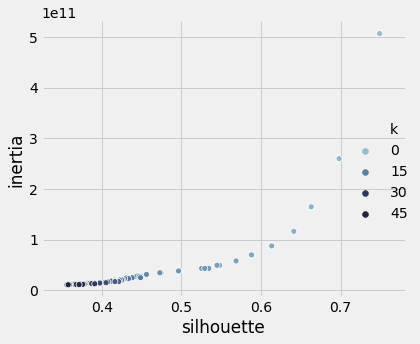

In [16]:
sns.relplot(x="silhouette", y="inertia", palette="ch:r=-.2,l=.7",  hue="k", data=my_ks)

In [11]:
#Matplotlibs defines
plt.rcParams.update({'figure.autolayout': True})
plt.style.use('fivethirtyeight')

[Text(0, 0.5, 'Valor'),
 Text(0.5, 0, 'K'),
 Text(0.5, 1.0, 'Métricas de Kmeans')]

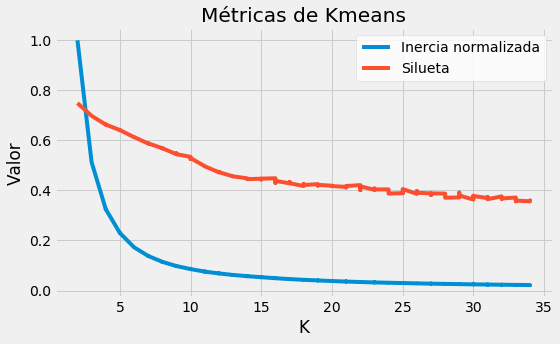

In [12]:

fig1, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(kk, nine, label="Inercia normalizada")
ax1.plot(kk, shil, label="Silueta")
legend1 = ax1.legend(frameon=True)
legend1.get_frame().set_facecolor((1, 1, 1))
ax1.set(xlabel="K", 
       ylabel="Valor",
       title="Métricas de Kmeans")

In [13]:
fig1.savefig(fname="/home/jorge/tfm-jvm/memoria/oficial/figures/metrica_kmeans.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [27]:
ks = my_ks[(my_ks["k"] < 10) & (my_ks["k"] >= 6)]["k"].unique().tolist()
ks

[6, 7, 8, 9]

In [43]:
ks = list(range(2,9))
ks

[2, 3, 4, 5, 6, 7, 8]

In [44]:
%%time
ko = []
for i in ks:
    k = KMeans(n_clusters=i)
    k_labels = k.fit_predict(data)
    k_silhouette = silhouette_score(data, k_labels)
    k_s_samples = silhouette_samples(data, k_labels)
    ko.append((i, k_silhouette, k_s_samples, k_labels))  
    print(i)

2
3
4
5
6
7
8
CPU times: user 1h 29min 22s, sys: 1h 19min 56s, total: 2h 49min 18s
Wall time: 36min 44s


In [120]:
def get_siluete(fig, ax, item, l, ii):
    y_lower = 10
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, l + (item[0] + 1) * 10])
    for i in range(item[0]):
        i_clus = item[2][item[3] == i]
        i_clus.sort()
        size_cluster_i = i_clus.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / item[0])
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, i_clus,
                          facecolor=color, 
                          edgecolor=color, 
                          alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        
    ax.set_title("Silueta con K=" + str(ii))
    ax.set_xlabel("Valor de silueta")
    ax.set_ylabel("Grupos")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=item[1], color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


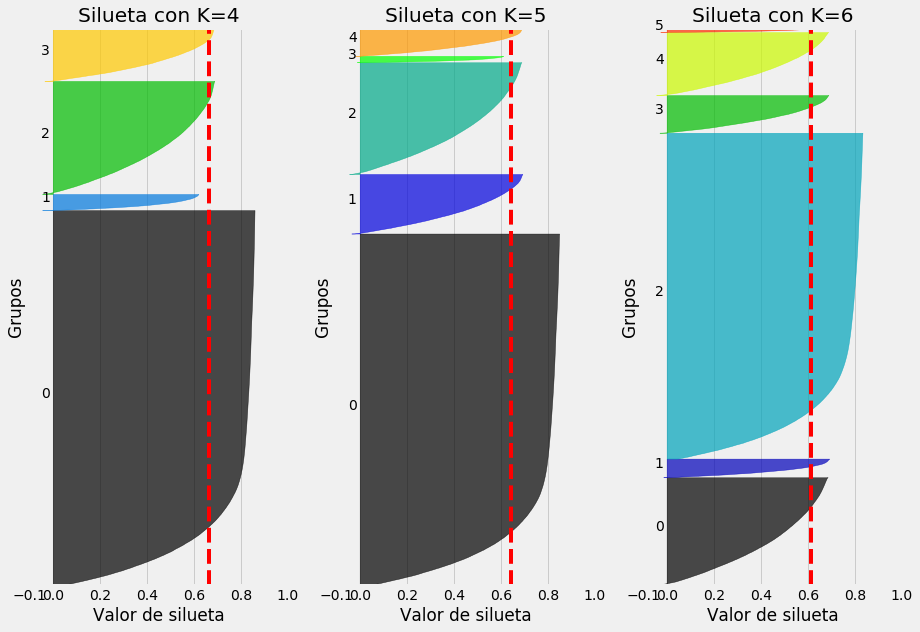

In [130]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(13, 9)
get_siluete(fig, ax[0], ko[2], len(ko[2][3]), 4)
get_siluete(fig, ax[1], ko[3], len(ko[3][3]), 5)
get_siluete(fig, ax[2], ko[4], len(ko[4][3]), 6)

In [131]:
fig.savefig(fname="/home/jorge/tfm-jvm/memoria/oficial/figures/sil_kmeans.png")

In [108]:
def sub_siluete(items):
    fig, axs = plt.subplots(2, 4)
    fig.set_size_inches(14, 8)
    
    get_siluete(fig, axs[0][0], items[0], len(items[0][3]))
    get_siluete(fig, axs[0][1], items[1], len(items[0][3]))
    get_siluete(fig, axs[0][2], items[2], len(items[0][3]))
    get_siluete(fig, axs[0][3], items[3], len(items[0][3]))
    get_siluete(fig, axs[1][0], items[4], len(items[0][3]))
    get_siluete(fig, axs[1][1], items[5], len(items[0][3]))
    get_siluete(fig, axs[1][2], items[6], len(items[0][3]))
    return fig, axs

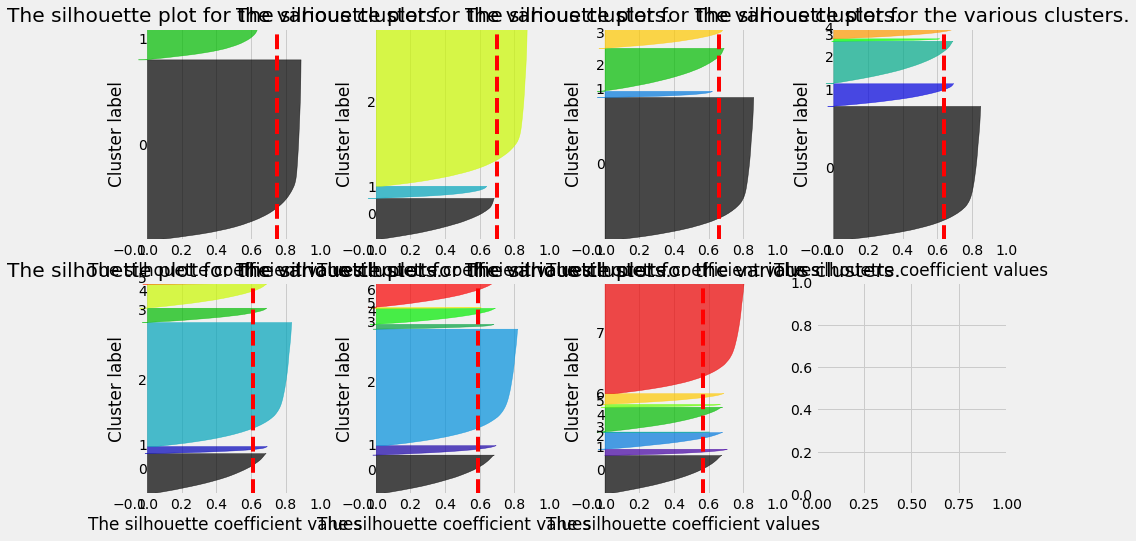

In [110]:
fig, axs = sub_siluete(ko)

In [111]:
fig.savefig(fname="/home/jorge/tfm-jvm/memoria/oficial/figures/sil_kmeans.eps")

/home/jorge/miniconda3/envs/tfm_jvm/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  """Entry point for launching an IPython kernel.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists

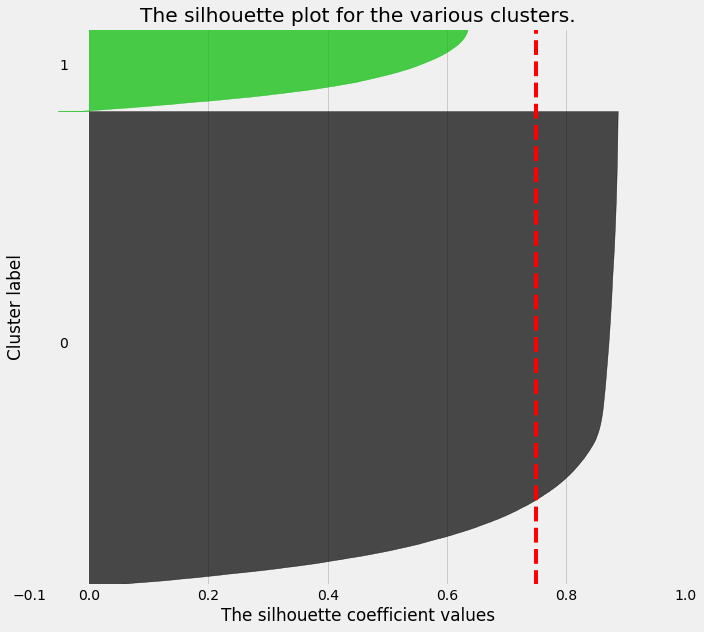

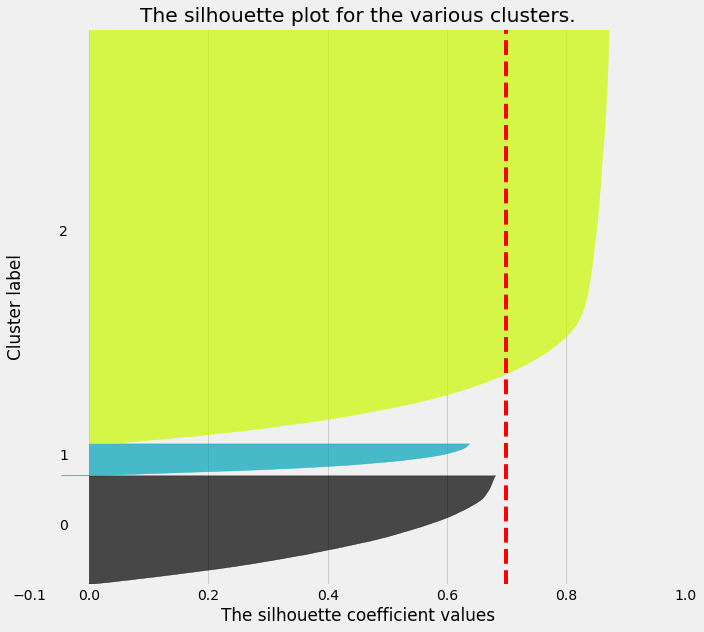

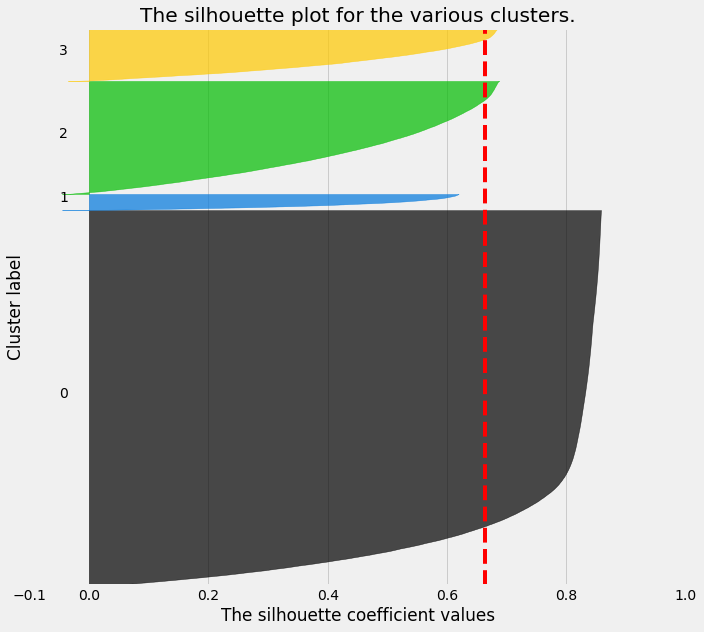

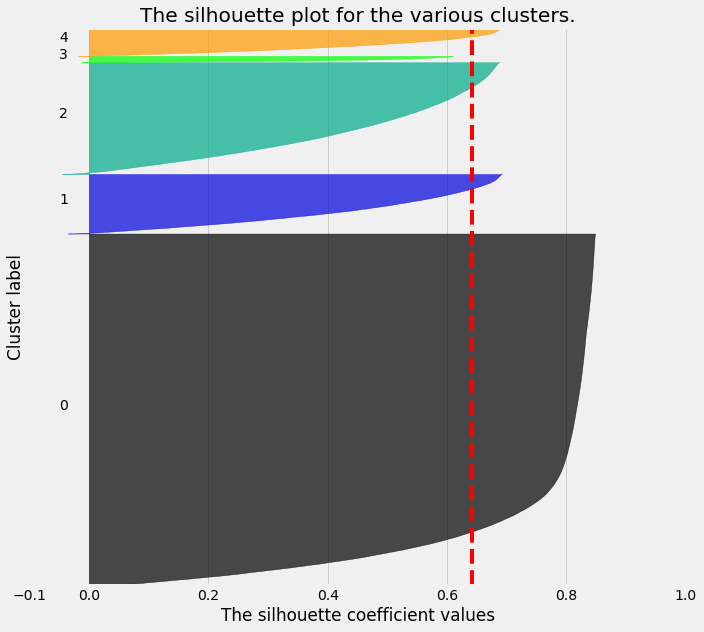

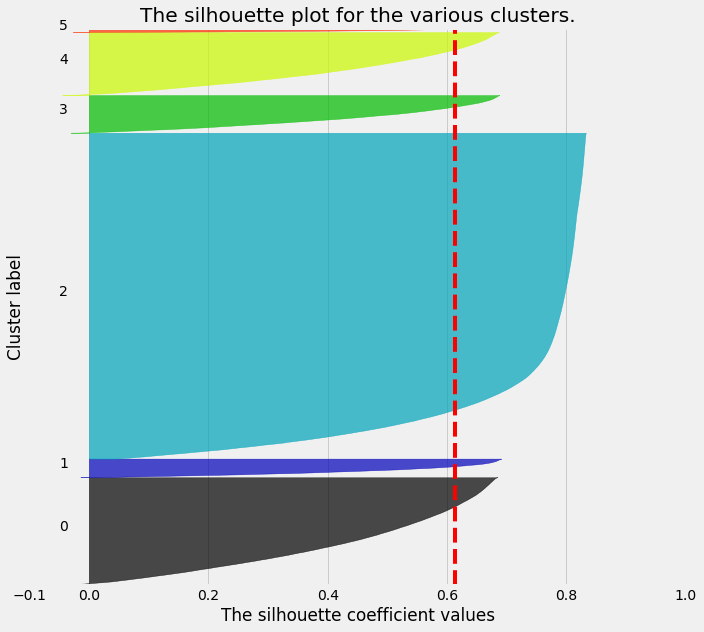

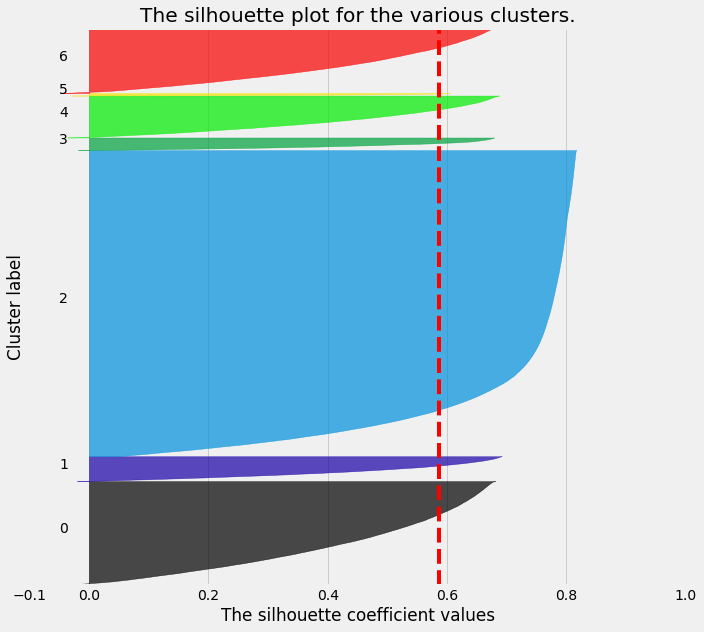

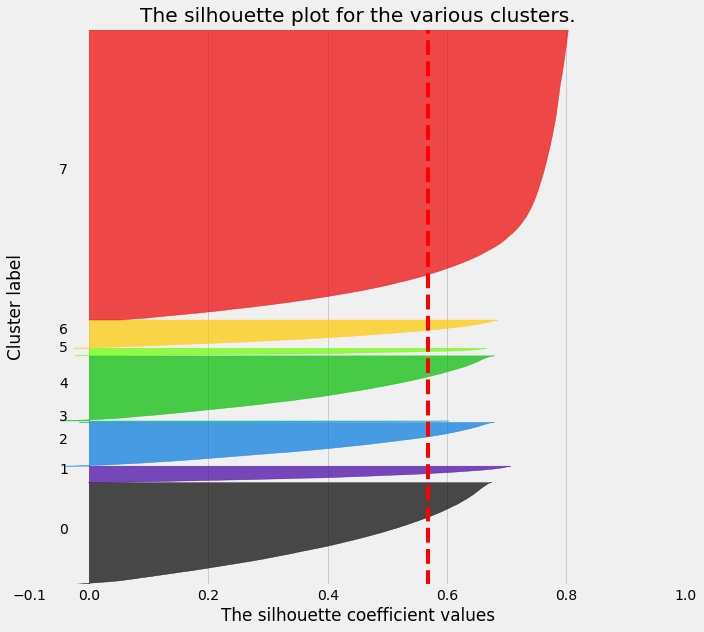

In [46]:

for item in ko:
    y_lower = 10
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 9)
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(data) + (item[0] + 1) * 10])
    for i in range(item[0]):
        i_clus = item[2][item[3] == i]
        i_clus.sort()
        size_cluster_i = i_clus.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / item[0])
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, i_clus,
                          facecolor=color, 
                          edgecolor=color, 
                          alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
        
    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=item[1], color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
plt.show()

## Plot Polar Chart